Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

WebTraffic Dataset Generation Example

In [14]:
"""
Initial config
"""
import os

# Navigate to correct directory
print(os.getcwd())
if os.getcwd().endswith("notebooks"):
    os.chdir("../")
print(os.getcwd())

# Setup auto reload of source code changes
%load_ext autoreload
%autoreload 2

/Volumes/workplace/JE-Workspace/src/MILTimeSeriesClassification
/Volumes/workplace/JE-Workspace/src/MILTimeSeriesClassification
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Repeat 0
{'amplitude': 3.476234385858519, 'intercept': 4.7786822256421875, 'phase': -0.012275590985557992, 'skew': 2.707635572003797, 'sample_std': 0.2418194362177732, 'week_amplitude': 1.164893285712608}
Repeat 1
{'amplitude': 3.871121105505157, 'intercept': 2.873480448834954, 'phase': -0.007034543423962723, 'skew': 1.3481983861457802, 'sample_std': 0.2620046988727065, 'week_amplitude': 0.9491841232530452}
Repeat 2
{'amplitude': 3.3122170589061044, 'intercept': 4.991356109677474, 'phase': -0.001586980082595904, 'skew': 2.3824570179786315, 'sample_std': 0.14855761385854593, 'week_amplitude': 1.1452557842925633}
Repeat 3
{'amplitude': 2.0883642397436435, 'intercept': 3.3183809024115916, 'phase': 0.04641193787243461, 'skew': 2.125875779522582, 'sample_std': 0.1949997459488949, 'week_amplitude': 1.1152882710324867}
Repeat 4
{'amplitude': 2.3865153501399483, 'intercept': 4.0965375434814915, 'phase': 0.021525448808669065, 'skew': 1.2703550863531752, 'sample_std': 0.15394939249743483, 'week_

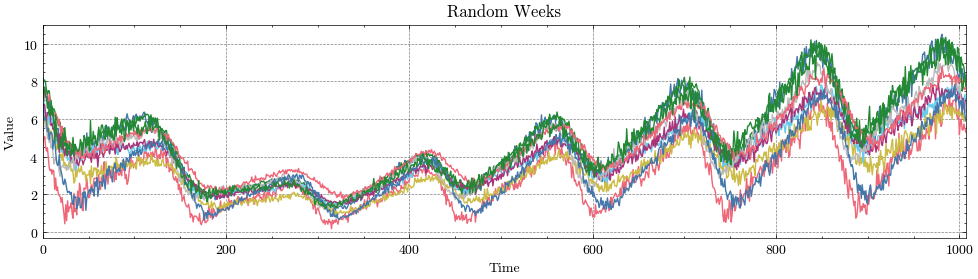

In [15]:
"""
Plot example random weeks with no signatures injected.
"""
from millet.data.web_traffic_generation import create_random_week
from matplotlib import pyplot as plt

# Need to keep scienceplots imported for matplotlib styling even though the import is never used directly
# noinspection PyUnresolvedReferences
import scienceplots

# Configure matplotlib style
plt.style.use(["science", "bright", "no-latex", "grid"])


def plot_time_series(ts_values, time=None, axis=None, title=None, alpha=1, colour=None):
    """
    Helper function for plotting time series.
    """
    if axis is None:
        _, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    if time is None:
        time = range(len(ts_values))
    axis.plot(time, ts_values, color=colour, alpha=alpha)
    axis.set_xlabel("Time")
    axis.set_ylabel("Value")
    axis.set_xlim(0, time[-1])
    if title is not None:
        axis.set_title(title)
    return axis


n_repeats = 10
random_weeks_axis = None
for r in range(n_repeats):
    week_rate, week_sample, week_params = create_random_week()
    print("Repeat {:d}".format(r))
    print(week_params)
    random_weeks_axis = plot_time_series(week_sample, axis=random_weeks_axis, title="Random Weeks")
plt.tight_layout()

None
[]
{'len': 0, 'mae': 0.0, 'mse': 0.0}
Spikes
[[  57   57]
 [ 387  387]
 [ 395  395]
 [ 608  608]
 [ 733  733]
 [ 899  899]
 [ 912  912]
 [ 919  919]
 [ 954  954]
 [1004 1004]
 [1005 1005]]
{'len': 11, 'mae': 0.03125702416735541, 'mse': 0.08982508594154678}
Flip
[[407 576]]
{'len': 169, 'mae': 0.2636151211843175, 'mse': 0.5023839033996205}
Skew
[[280 372]]
{'len': 92, 'skew': 0.9461687428245894, 'mae': 0.02995319100315367, 'mse': 0.014639422854768472}
Noise
[[668 764]]
{'len': 96, 'noise_std': 0.7302164098896314, 'mae': 0.05143933602444261, 'mse': 0.041206182440728496}
Cutoff
[[566 816]]
{'len': 250, 'cutoff': 0.12202261641373822, 'mae': 1.2811450347109463, 'mse': 7.048226344934675}
Average
[[801 914]]
{'len': 113, 'window_size': 6, 'mae': 0.020253364238567946, 'mse': 0.0057992303286506725}
Wander
[[579 754]]
{'len': 175, 'w:': 2.8405966454475324, 'mae': 0.24657956991732055, 'mse': 0.46829722528911794}
Peak
[[557 806]]
{'len': 249, 'scale': 1.9616422604129764, 'mae': 0.188222100191

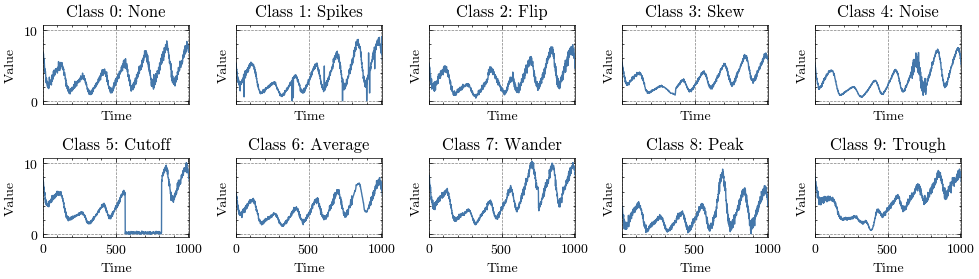

In [16]:
"""
Show how signatures are injected and plot
"""
from millet.data.web_traffic_generation import WEBTRAFFIC_CLZ_NAMES, inject_signature


_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3), sharex=True, sharey=True)
for clz, signature_name in enumerate(WEBTRAFFIC_CLZ_NAMES):
    # Create random week as before
    _, week_sample, _ = create_random_week()
    # Inject signature
    ts_w_signature, signature_locations, signature_details = inject_signature(week_sample, signature_name)
    print(signature_name.capitalize())
    print(signature_locations)
    print(signature_details)
    # Plot time series
    axis = axes[clz // 5, clz % 5]
    plot_time_series(
        ts_w_signature,
        axis=axis,
        title="Class {:d}: {:s}".format(clz, signature_name.capitalize()),
    )
plt.tight_layout()

In [17]:
"""
Example of generating a complete dataset.

In this example, we create a smaller training dataset with only 5 time series per class, and only for the classes None, Peak, and Trough.
"""
import numpy as np

from millet.data.web_traffic_generation import generate_and_save_dataset
from millet.data.web_traffic_dataset import WebTrafficDataset

# Dataset params
dataset_name = "WebTraffic2"
split = "TRAIN"
n_ts_per_class = 5
signature_clzs = ["none", "peak", "trough"]

# Generate new dataset - seed used to ensure consistency
np.random.seed(12)
generate_and_save_dataset(dataset_name, split, signature_clzs)

# Load as an example
train_dataset = WebTrafficDataset(name="WebTraffic2", split="train")
print("Train Size:", len(train_dataset))
print("Number of classes:", train_dataset.n_clz)
print("Time Series length:", len(train_dataset.get_bag(0)))

Generated dataframe containing 150 time series
Saved data to data/WebTraffic/WebTraffic2_TRAIN.csv
Saved metadata to data/WebTraffic/WebTraffic2_TRAIN_metadata.json
Train Size: 150
Number of classes: 3
Time Series length: 1008
